# **Identifying Key Indicators of Corporate Bankruptcy for Strategic Investment Decisions**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## **Project Objective and Scope**

The objective of this project is to analyze a dataset titled `com(all).csv`, which records detailed information about corporate bankruptcies over a specific period in Chinese, but was translated as `bankrupt_companies_translated.csv` instead. The goal is to extract and summarize key patterns, factors, and characteristics that contribute to company failures. This analysis aims to provide actionable insights and references for strategic investment decisions. While additional data on publicly listed companies is acknowledged to offer further context, the current study focuses solely on the provided dataset. Through data exploration, feature analysis, and predictive modeling, this project seeks to identify risk indicators and offer recommendations to guide future investment strategies.


## Initial Data Overview

In [2]:
df = pd.read_csv('bankrupt_companies_translated.csv',)

print("Display the first 5 rows of data:")
print(df.head())

Display the first 5 rows of data:
   serial_number               company_name     region   main_category  \
0              1   Maizi Financial Services   Shanghai         finance   
1              1  Tuodao Financial Services   Zhejiang         finance   
2              1          Yunbai Technology  Guangdong  medical health   
3              1            mini fresh food     Fujian      e-commerce   
4              1               Healthy life    Beijing  medical health   

                            subcategory  \
0                                  loan   
1                                  loan   
2          Medical devices and hardware   
3                            fresh food   
4  Seek medical diagnosis and treatment   

                                     company_profile founded_date  \
0  Maizi Financial Services is a mobile Internet ...   2015-03-01   
1  Tuodao Financial is a P2P Internet financial c...   2013-11-01   
2  Yunbai Technology is a developer of smart heal...   

## **Data Description**

The dataset contains information about companies that experienced bankruptcy. Below is a description of each column and its relevance to the analysis:

- **serial_number**: A unique identifier assigned to each record in the dataset.  
- **company_name**: The official name of the company that declared bankruptcy.  
- **region**: The geographical location where the company operates, indicating regional business environments and risks.  
- **main_category**: The industry or business sector to which the company belongs (e.g., finance, e-commerce). This helps identify sectors with higher failure rates.  
- **subcategory**: A more specific categorization of the company’s activities within its main industry.  
- **company_profile**: A brief description of the company’s business model or focus area.  
- **founded_date**: The date when the company was established, used to calculate survival time.  
- **bankruptcy_date**: The date when the company declared bankruptcy.  
- **survival_days**: The number of days the company survived from its founding until bankruptcy.  
- **financing_rounds**: The stages of external funding the company received (e.g., Series A, Seed Round).  
- **total_funding**: The total amount of financial capital (in currency units) raised by the company over its lifetime.  
- **bankruptcy_reason**: Key reasons cited for the company's bankruptcy (e.g., industry competition, regulatory risks).  
- **investors**: Information about venture capitalists or investment firms that supported the company financially.  
- **ceo_name**: The name of the company’s Chief Executive Officer at the time of operations.  
- **ceo_title**: The CEO’s title, sometimes indicating their additional roles (e.g., founder, chairman).  
- **ceo_profile**: Detailed information about the CEO’s background, experience, and other relevant details.

This dataset offers a comprehensive view of the factors and events leading to corporate bankruptcies, providing valuable data points for further analysis and investment strategy development.


In [3]:
#check the information for data

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   serial_number      6272 non-null   int64  
 1   company_name       6272 non-null   object 
 2   region             6272 non-null   object 
 3   main_category      6272 non-null   object 
 4   subcategory        6272 non-null   object 
 5   company_profile    6272 non-null   object 
 6   founded_date       6272 non-null   object 
 7   bankruptcy_date    6272 non-null   object 
 8   survival_days      6272 non-null   int64  
 9   financing_rounds   6272 non-null   object 
 10  total_funding      805 non-null    float64
 11  bankruptcy_reason  1419 non-null   object 
 12  investors          600 non-null    object 
 13  ceo_name           4839 non-null   object 
 14  ceo_title          4837 non-null   object 
 15  ceo_profile        4839 non-null   object 
dtypes: float64(1), int64(2),

In [4]:
print("\nMissing values count:")
print(df.isnull().sum())
print("\nDuplicate rows count:", df.duplicated().sum())


Missing values count:
serial_number           0
company_name            0
region                  0
main_category           0
subcategory             0
company_profile         0
founded_date            0
bankruptcy_date         0
survival_days           0
financing_rounds        0
total_funding        5467
bankruptcy_reason    4853
investors            5672
ceo_name             1433
ceo_title            1435
ceo_profile          1433
dtype: int64

Duplicate rows count: 0


In [5]:
# Convert 'founded_date' and 'bankruptcy_date' to date time format
df['founded_date'] = pd.to_datetime(df['founded_date'], errors='coerce')
df['bankruptcy_date'] = pd.to_datetime(df['bankruptcy_date'], errors='coerce')

# Calculate the survival duration of each company in days
df['survival_days'] = (df['bankruptcy_date'] - df['founded_date']).dt.days

In [6]:
# Display summary statistics for 'survival_days'
print("\nSurvival Days Statistics:")
print(df['survival_days'].describe())

# Industry Distribution
print("\nIndustry Distribution:")
print(df['main_category'].value_counts())

# Financing Rounds Distribution
print("\nFinancing Rounds Distribution:")
print(df['financing_rounds'].value_counts())

# Bankruptcy Reasons Distribution
print("\nBankruptcy Reasons Distribution:")
print(df['bankruptcy_reason'].value_counts())


Survival Days Statistics:
count    6272.000000
mean     1304.558036
std       646.994339
min     -4616.000000
25%       855.000000
50%      1121.000000
75%      1674.000000
max      8622.000000
Name: survival_days, dtype: float64

Industry Distribution:
main_category
e-commerce               925
Enterprise services      789
local life               595
finance                  510
social network           500
Entertainment media      421
educate                  376
Tool software            374
game                     334
car traffic              311
travel                   255
medical health           201
hardware                 178
advertising marketing    172
Real estate services     124
sports                    73
new industry              72
logistics                 58
agriculture                4
Name: count, dtype: int64

Financing Rounds Distribution:
financing_rounds
unclear                  3452
Not yet funded           1798
angel wheel               528
Series A       

## Preliminary Analysis

### Industry Risks  
From the dataset, industries such as **e-commerce, enterprise services, and local life businesses** have the highest bankruptcy rates. These industries typically require high customer acquisition costs and rapid scaling, making them vulnerable to financial distress if initial traction is not achieved. On the other hand, industries like **agriculture and logistics** show lower bankruptcy rates, possibly due to their stable demand and longer-term business models.  

### Funding Stages  
A significant number of failed companies **did not secure any funding** or were in very early financing rounds, such as **Angel or Series A rounds**. This suggests that many businesses shut down before they could secure sufficient investment to scale operations. Companies that successfully raised later-stage funding (e.g., **B round or beyond**) had a lower probability of failure, implying that securing early-stage investment is crucial for long-term survival.  

### Causes of Bankruptcy  
The most frequent causes of bankruptcy include:  
- **Lack of a viable business model** (291 cases) – Companies without a clear monetization strategy or sustainable revenue streams struggled to survive.  
- **Industry competition** (144 cases) – Overcrowded markets led to intense price wars and lower profit margins.  
- **Market pseudo demand** (115 cases) – Companies miscalculated actual market demand, leading to unsustainable growth.  
- **Business adjustments & restructuring** (94 cases) – Organizational changes, cost-cutting efforts, or pivoting to new business models often failed to prevent closure.  

These reasons highlight the importance of validating product-market fit and maintaining financial flexibility during market shifts.  

### Survival Time Analysis
- The **average survival time** for bankrupt companies is approximately **1,365 days (3.7 years)**, indicating that most businesses fail within their early growth phase.
- The **minimum survival time** observed is **121 days**, suggesting that some companies shut down very quickly after establishment.
- The **maximum survival time** recorded is **8,622 days (23.6 years)**, which indicates that some companies managed to sustain operations for a significant period before bankruptcy.
- **Companies with longer survival times** often reached later-stage funding rounds, reinforcing the importance of securing financial backing.

## Investment Recommendations

### Industry Selection  
- Investors should be cautious when investing in **e-commerce and enterprise services**, as these industries exhibit high failure rates.  
- Sectors such as **logistics, agriculture, and real estate services** show better stability and may provide safer investment opportunities.  

### Funding Strategies  
- Companies that fail early often lack external funding, particularly in later rounds.  
- Investors should **prioritize companies that have already secured stable Series A or B funding** to reduce risk.  
- Businesses with a clear roadmap to later-stage financing rounds have a **higher chance of survival**.  

### Business Model & Market Demand  
- Startups should **validate their business models and market demand early** before scaling operations.  
- Investors should **avoid funding companies that lack clear revenue strategies** or depend solely on unsustainable user growth.  

### Survival Time Considerations  
- Businesses that fail within **the first three years** often struggle with cash flow or competition.  
- Investors should focus on companies with **longer-term market adaptability** and a proven track record of sustained growth before committing capital.  


This preliminary analysis provides a **data-driven approach** to identifying investment risks and opportunities, helping investors make more informed decisions.


In [7]:
print(df.head())

   serial_number               company_name     region   main_category  \
0              1   Maizi Financial Services   Shanghai         finance   
1              1  Tuodao Financial Services   Zhejiang         finance   
2              1          Yunbai Technology  Guangdong  medical health   
3              1            mini fresh food     Fujian      e-commerce   
4              1               Healthy life    Beijing  medical health   

                            subcategory  \
0                                  loan   
1                                  loan   
2          Medical devices and hardware   
3                            fresh food   
4  Seek medical diagnosis and treatment   

                                     company_profile founded_date  \
0  Maizi Financial Services is a mobile Internet ...   2015-03-01   
1  Tuodao Financial is a P2P Internet financial c...   2013-11-01   
2  Yunbai Technology is a developer of smart heal...   2014-09-01   
3  Mini Fresh is a m

# 1. INDUSTRY

C:\Users\User\AppData\Local\Temp\ipykernel_25020\3997116017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


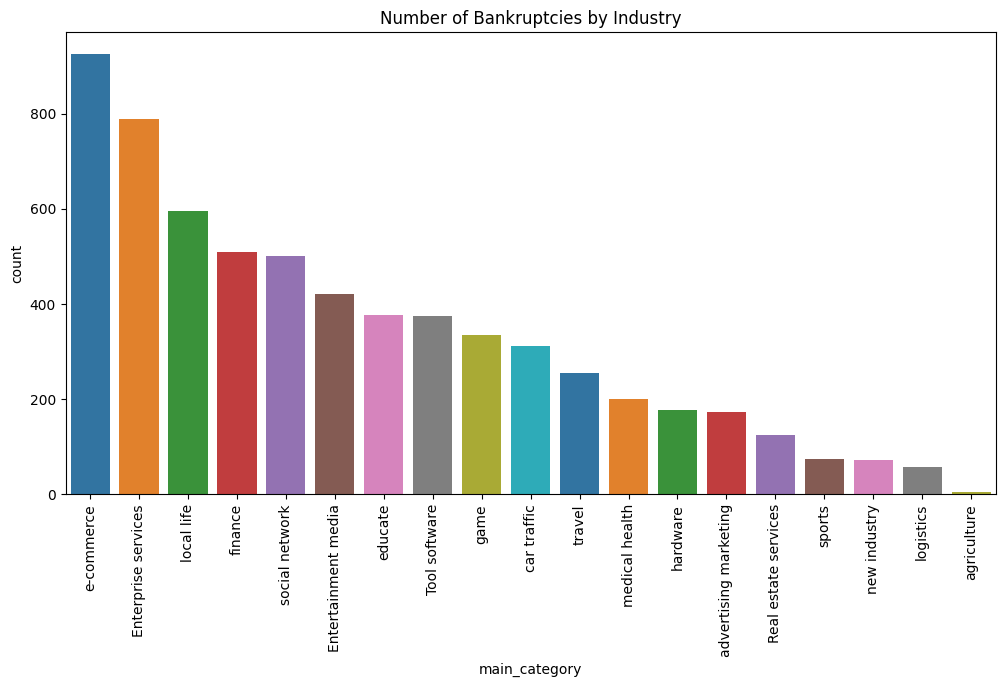

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df, 
    x='main_category', 
    order=df['main_category'].value_counts().index, 
    palette="tab10" 
)
plt.xticks(rotation=90)
plt.title("Number of Bankruptcies by Industry")
plt.show()

### Analysis

This visualization highlights the distribution of bankruptcies across various industries. The **e-commerce** sector has the highest number of bankruptcies, followed closely by **enterprise services** and **local life** industries. These sectors likely face intense competition, rapid technological changes, and fluctuating consumer demand, which can increase the risk of business failure.  

Conversely, industries such as **agriculture**, **logistics**, and **new industries** exhibit a much lower frequency of bankruptcies. This could indicate either higher stability or lower representation in the dataset. These observations can inform investment strategies by identifying industries with higher financial risks and opportunities for diversification.  

It's important to further investigate the factors driving these trends, such as business models, market competition, and access to capital, to better understand industry vulnerabilities.


# 2. REGION

C:\Users\User\AppData\Local\Temp\ipykernel_25020\3075728174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='region', order=df['region'].value_counts().index, palette="tab10")


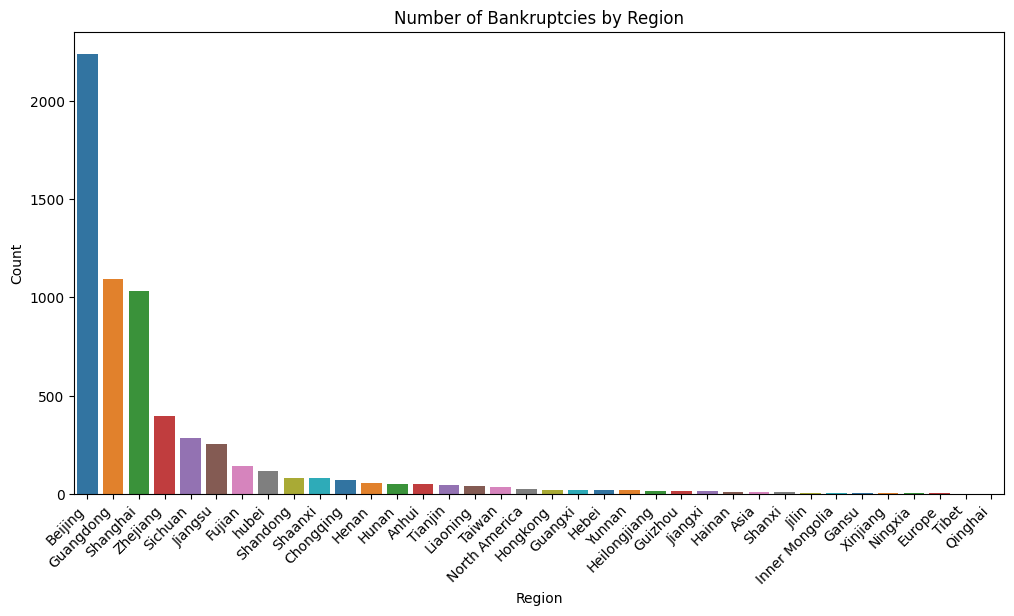

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='region', order=df['region'].value_counts().index, palette="tab10")
plt.xticks(rotation=45, ha='right') 
plt.title('Number of Bankruptcies by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

### Analysis

The visualization illustrates the geographical distribution of bankruptcies. **Beijing** has an overwhelming number of bankruptcies, followed by **Guangdong** and **Shanghai**. These regions are major business hubs with a high concentration of companies, leading to increased exposure to both opportunities and risks. The higher number of bankruptcies could reflect intense market competition and financial pressure on businesses operating in these areas.

In contrast, regions such as **Tibet**, **Qinghai**, and **Inner Mongolia** report few or no bankruptcies, which may be due to limited business activities or a different economic landscape compared to the more industrialized regions.

For investors, these insights suggest that while major economic centers offer substantial investment opportunities, they also come with elevated risks. Diversifying investments across regions with varying levels of market competition may help mitigate risk.


# 3. SURVIVAL TIME

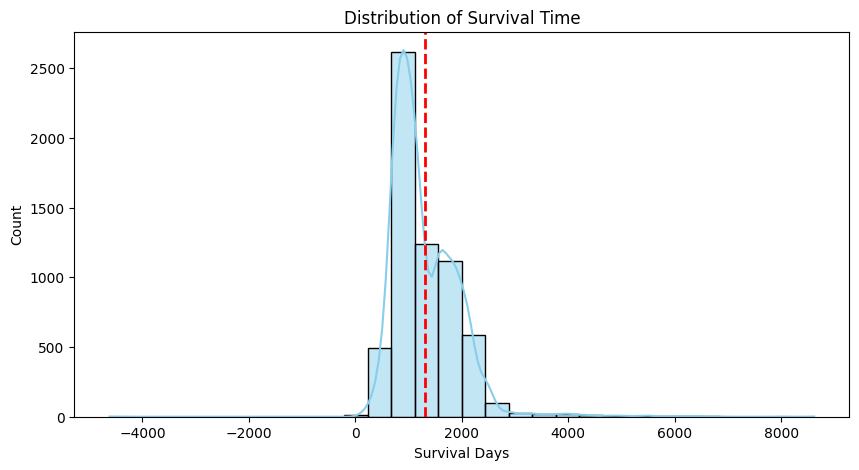

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['survival_days'], bins=30, kde=True, color='skyblue')  
plt.axvline(df['survival_days'].mean(), color='red', linestyle='dashed', linewidth=2) 
plt.title('Distribution of Survival Time')
plt.xlabel('Survival Days')
plt.ylabel('Count')
plt.show()


### Analysis

The histogram displays the distribution of company survival times, with a dashed red line indicating the mean survival time. Most companies have a survival period clustered around **1,500 to 2,000 days** (approximately 4 to 5.5 years), suggesting that many firms face significant challenges around this timeframe.

Notably, there are outliers where companies have negative or extremely high survival times. These may be due to data errors or companies that were restructured, acquired, or had special circumstances. 

This analysis highlights that early to mid-growth stages may be critical for business stability. For investors, identifying companies with strategies to overcome this "survival bottleneck" may be a key factor in long-term investment success.


# 4. BANKRUPTCY REASONS

In [11]:
# Remove NaN values 
df = df.dropna(subset=['bankruptcy_reason'])

# Standardize format (convert to lowercase, strip trailing spaces)
df['bankruptcy_reason'] = df['bankruptcy_reason'].str.lower().str.strip()

bankruptcy_reason_split = df['bankruptcy_reason'].str.split(',')

# Explode the list 
bankruptcy_reason_exploded = bankruptcy_reason_split.explode().str.strip()
# Count
bankruptcy_reason_counts = bankruptcy_reason_exploded.value_counts()

print("Top 20 Most Common Bankruptcy Reasons:")
print(bankruptcy_reason_counts.head(20))

Top 20 Most Common Bankruptcy Reasons:
bankruptcy_reason
lack of business model                                          314
industry competition                                            193
market pseudo demand                                            115
business adjustment                                             100
policy supervision                                               76
legal and regulatory risks                                       59
false market demand and lack of business model                   59
insufficient financing capacity                                  51
product entry timing industry competition                        46
lack of business models and industry competition                 40
business is too fragmented                                       31
product entry timing                                             30
burning money                                                    29
pricing/cost issues                                        

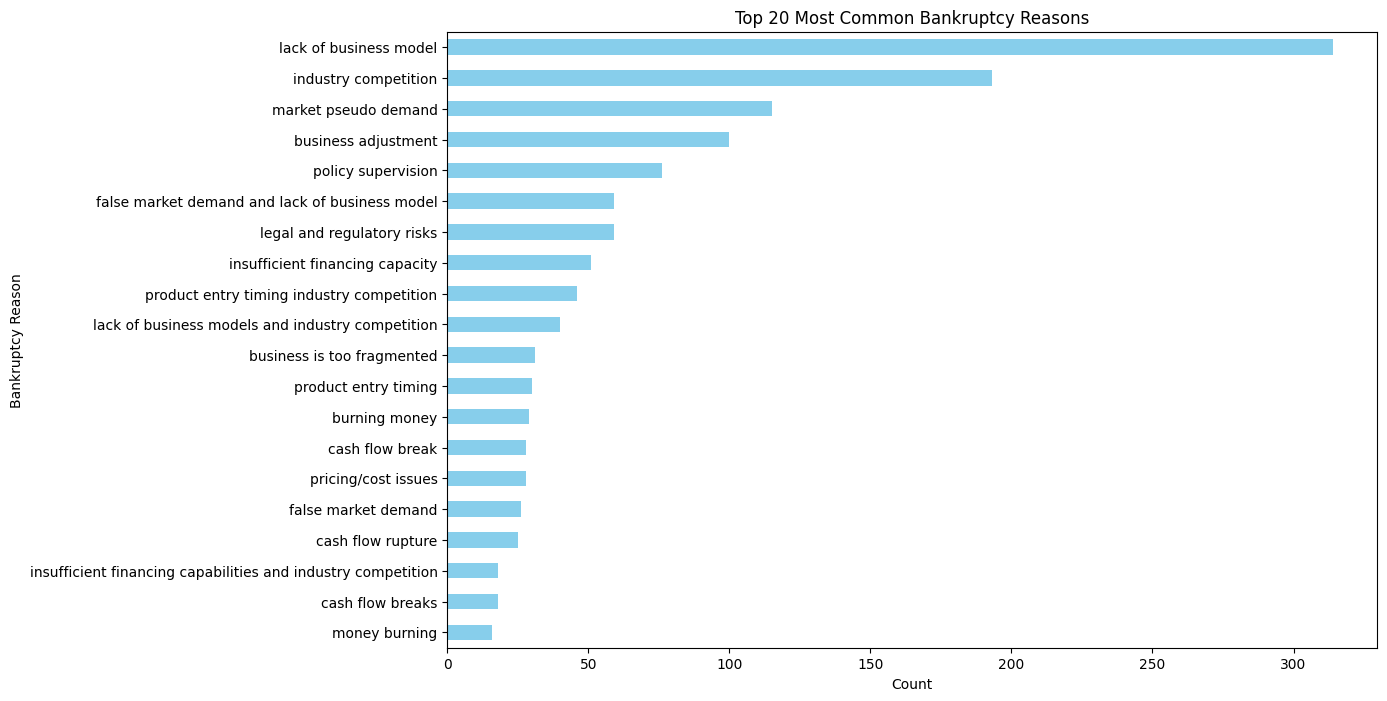

In [12]:
plt.figure(figsize=(12, 8))
bankruptcy_reason_counts.head(20).sort_values().plot(kind='barh', color='skyblue')

plt.title("Top 20 Most Common Bankruptcy Reasons")
plt.xlabel("Count")
plt.ylabel("Bankruptcy Reason")

plt.show()

### Analysis

The bar chart provides a visual representation of the top 20 reasons for company bankruptcy. **"Lack of business model"** is the most significant factor, with over **300 occurrences**, indicating that strategic misalignment is a frequent cause of business failure. **"Industry competition"** ranks second, emphasizing the challenges many companies face in maintaining market share.

Other notable factors include **"market pseudo demand"** and **"business adjustment issues"**, both of which highlight how businesses struggle to adapt to changing market conditions. Regulatory and legal pressures, insufficient financing, and fragmented business models also contribute to high failure rates.  

This visualization confirms that companies without clear strategic direction, competitive positioning, or adaptability are at greater risk of failure. Investors should prioritize businesses that demonstrate well-defined, robust strategies and resilience to external challenges.


# 5. NUMBER OF BANKRUPTCIES VS ROUND

C:\Users\User\AppData\Local\Temp\ipykernel_25020\2797943313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='financing_rounds', order=df['financing_rounds'].value_counts().index, palette="muted")


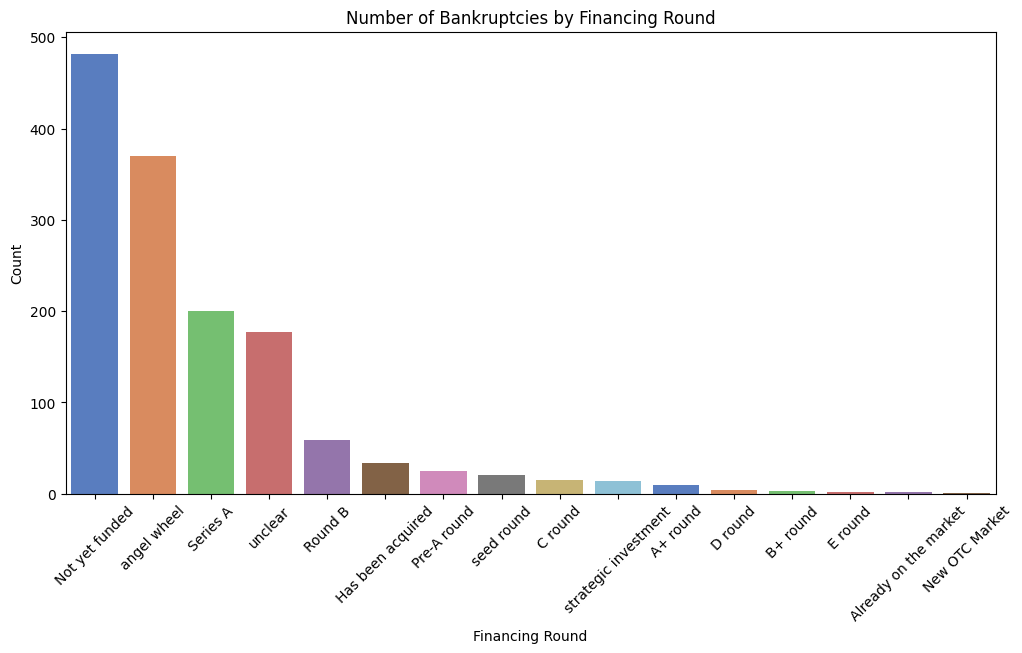

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='financing_rounds', order=df['financing_rounds'].value_counts().index, palette="muted")

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Number of Bankruptcies by Financing Round")
plt.xlabel("Financing Round")
plt.ylabel("Count")

plt.show()

### Analysis

This bar chart illustrates the distribution of bankruptcies across various financing rounds. Companies classified as **"Not yet funded"** dominate the bankruptcy count, exceeding **400 cases**, indicating that early-stage businesses are particularly vulnerable to failure due to inadequate capital. The **"angel wheel"** stage also shows a significant number of bankruptcies, suggesting high risk in the early financing phases. 

Interestingly, companies that reached the **"Series A"** round still exhibit notable failure rates, highlighting that even with initial market traction and investor support, challenges such as scaling operations or market competition can jeopardize sustainability. In contrast, later rounds (e.g., **Round B, C, and D**) exhibit relatively lower counts, implying that companies surviving to advanced rounds often have more robust business models and resources. 

For investors, this data emphasizes the importance of rigorous due diligence and support structures, particularly for early-stage investments.


# 6. NUMBER OF BANKRUPTCIES VS YEARS

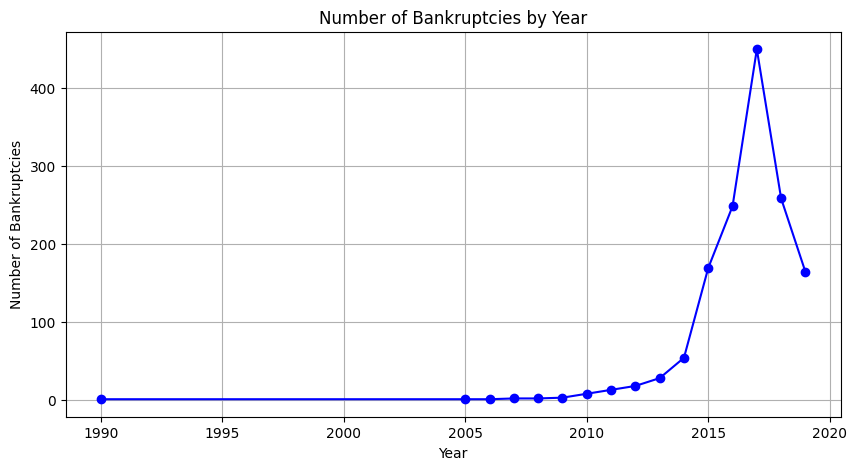

In [14]:
df['bankruptcy_date'] = pd.to_datetime(df['bankruptcy_date'], errors='coerce')

# Step 2: Extract the year from the bankruptcy date
df['bankruptcy_year'] = df['bankruptcy_date'].dt.year

# Step 3: Count bankruptcies per year and plot the trend
plt.figure(figsize=(10, 5))
df['bankruptcy_year'].value_counts().sort_index().plot(marker='o', linestyle='-', color='b')

# Step 4: Formatting the plot
plt.title("Number of Bankruptcies by Year")
plt.xlabel("Year")
plt.ylabel("Number of Bankruptcies")
plt.grid(True)  # Add a grid for better visualization

# Step 5: Display the plot
plt.show()

### Analysis 

The line plot shows the yearly trend in company bankruptcies over a span of several decades. There is a noticeable increase in bankruptcies beginning around **2010**, with a sharp peak around **2015** where the number of failures exceeds **400** cases. This peak could be attributed to factors such as economic downturns, shifts in industry demands, or increased competition. 

Post-2015, the trend indicates a gradual decline in bankruptcies, suggesting a possible market correction or the survival of stronger companies. Before 2005, bankruptcies remained relatively low, potentially reflecting fewer startups or more conservative investment environments during those years.

This trend highlights that investors should be wary during periods of rapid market expansion, as these phases often precede a surge in company failures.


# 7. SURVIVAL DAYS VS ROUND

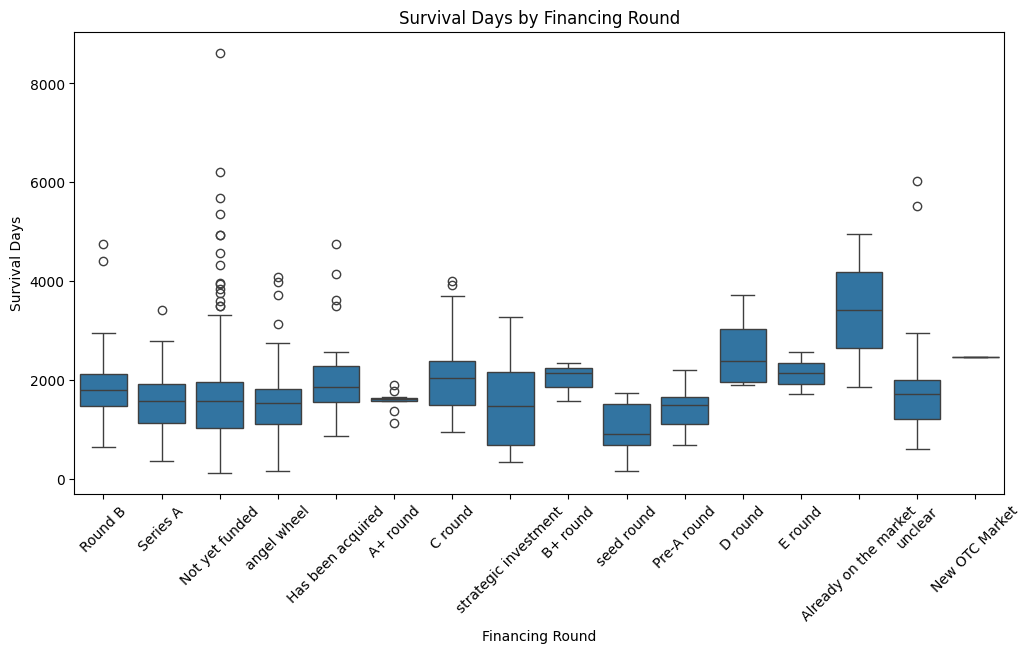

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='financing_rounds', y='survival_days', data=df)
plt.xticks(rotation=45)
plt.title("Survival Days by Financing Round")
plt.xlabel("Financing Round")
plt.ylabel("Survival Days")
plt.show()

### Analysis
The box plot presents the distribution of company survival days across different financing rounds. Companies in later-stage rounds, such as **E round**, **D round**, and **Already on the market**, tend to have longer survival times, with higher medians and wider interquartile ranges. This pattern indicates that companies that secure later-stage funding generally have established business models and stronger financial stability.

In contrast, early-stage companies, particularly those **Not yet funded** or at **Angel Wheel** stages, exhibit shorter survival durations, with several outliers reflecting either exceptional performance or companies that struggled for an extended period before eventual failure. Companies with unclear funding rounds show more scattered results, indicating inconsistent performance.

These insights suggest that later-stage investments may offer more stability and longevity, though early-stage ventures could present high-risk, high-reward opportunities. Investors should carefully evaluate funding stages when considering long-term growth potential.


# 8. logistic regression

In [16]:
# Companies with survival days less than 1500 are considered bankrupt
df['is_bankrupt'] = df['survival_days'] < 1500

# impute missing total_funding values with the median
df = df.assign(total_funding=df['total_funding'].fillna(df['total_funding'].median()))


# Convert categorical features (region, main_category, financing_rounds) to dummy variables
X = pd.get_dummies(df[['region', 'main_category', 'financing_rounds', 'total_funding', 'survival_days']], drop_first=True)

In [17]:
# Check if 'total_funding' exists in the features and add if missing
if 'total_funding' not in X.columns:
    print("The column 'total_funding' is missing from X. Adding it back.")
    X['total_funding'] = df['total_funding']

# Scale the 'total_funding' and 'survival_days' features
scaler = StandardScaler()
X[['total_funding_scaled', 'survival_days_scaled']] = scaler.fit_transform(X[['total_funding', 'survival_days']])

# Remove the original features after scaling
X = X.drop(['total_funding', 'survival_days'], axis=1)

In [18]:
#Split the dataset into training and testing sets
y = df['is_bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Ensure consistency in feature columns between training and testing sets
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Fill missing columns with 0

# Reorder columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Convert data types for compatibility with the model
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Convert float columns back to float type if needed
float_columns = ['total_funding_scaled', 'survival_days_scaled', 'const']
for col in float_columns:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype(float)
        X_test[col] = X_test[col].astype(float)

In [19]:
# Train the logistic regression model
logistic_model = LogisticRegression(max_iter=500, random_state=123)
logistic_model.fit(X_train, y_train)

#Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
print("\n### Confusion Matrix ###")
print(confusion_matrix(y_test, y_pred))

print("\n### Classification Report ###")
print(classification_report(y_test, y_pred))

print("\n### Accuracy Score ###")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")



### Confusion Matrix ###
[[150  15]
 [ 58  61]]

### Classification Report ###
              precision    recall  f1-score   support

       False       0.72      0.91      0.80       165
        True       0.80      0.51      0.63       119

    accuracy                           0.74       284
   macro avg       0.76      0.71      0.71       284
weighted avg       0.76      0.74      0.73       284


### Accuracy Score ###
Accuracy: 0.7430


The model achieved an accuracy of 0.7430. It performs well at predicting non-bankrupt companies with a recall of 0.91 but has a lower recall of 0.51 for bankrupt companies. Precision for predicting bankruptcy is 0.80, indicating most high-risk predictions are accurate but some bankruptcies are missed. Improvements may focus on recall to better identify actual bankruptcies.

# USE Model

In [20]:
# Predict bankruptcy status and probabilities for the test data
X_test_predictions = logistic_model.predict(X_test)  # Model prediction (bankruptcy status)
X_test_probabilities = logistic_model.predict_proba(X_test)[:, 1]  # Probability of bankruptcy

# Add the predictions and probabilities to the test DataFrame
X_test['Predicted Bankruptcy'] = X_test_predictions
X_test['Bankruptcy Risk Probability'] = X_test_probabilities

# Display the first 10 rows of predictions and risk probabilities
print(X_test[['Predicted Bankruptcy', 'Bankruptcy Risk Probability']].head(10))

# Analyze the risk distribution by categorizing probabilities into risk levels
risk_distribution = pd.cut(X_test_probabilities, bins=[0, 0.3, 0.7, 1], 
                           labels=['Low Risk', 'Medium Risk', 'High Risk']).value_counts()

# Print the risk distribution
print("\nRisk Distribution:\n", risk_distribution)

      Predicted Bankruptcy  Bankruptcy Risk Probability
1422                 False                     0.492350
1570                 False                     0.415551
1279                 False                     0.382876
339                  False                     0.407070
337                  False                     0.356942
1633                  True                     0.961440
56                    True                     0.985345
114                  False                     0.436965
5661                  True                     0.526272
3192                 False                     0.279252

Risk Distribution:
 Low Risk        71
Medium Risk    170
High Risk       43
Name: count, dtype: int64


In [21]:
# Analyze feature importance using the model coefficients
important_features = pd.DataFrame({
    'Feature': X_train.columns,           # Feature names
    'Coefficient': logistic_model.coef_[0]  # Corresponding coefficients
}).sort_values(by='Coefficient', ascending=False)  # Sort by importance (descending)

# Display the top 5 features that positively influence bankruptcy risk
print("\nTop 5 Features Positively Influencing Bankruptcy Risk:")
print(important_features.head(5))

# Display the top 5 features that negatively influence bankruptcy risk
print("\nTop 5 Features Negatively Influencing Bankruptcy Risk:")
print(important_features.tail(5))


Top 5 Features Positively Influencing Bankruptcy Risk:
                      Feature  Coefficient
9                region_Hebei     0.791398
31  main_category_agriculture     0.775168
25            region_Zhejiang     0.661776
14             region_Jiangsu     0.648427
37     main_category_hardware     0.639569

Top 5 Features Negatively Influencing Bankruptcy Risk:
                    Feature  Coefficient
22           region_Tianjin    -0.715378
39  main_category_logistics    -0.768352
17           region_Shaanxi    -0.795735
16     region_North America    -1.388604
61     survival_days_scaled    -4.329332


### Bankruptcy Risk Distribution Analysis

The model's predictions categorize companies into different bankruptcy risk levels based on their probabilities. The distribution is as follows:

- **Low Risk (Probability 0.0 - 0.3):** 71 companies
- **Medium Risk (Probability 0.3 - 0.7):** 170 companies
- **High Risk (Probability 0.7 - 1.0):** 43 companies

These results help investors focus on companies categorized as high-risk for further evaluation and due diligence.


### Feature Importance Analysis

The logistic regression model reveals which features significantly influence bankruptcy risk. Features with positive coefficients increase the likelihood of bankruptcy, while negative coefficients decrease it.

**Top 5 Features Positively Influencing Bankruptcy Risk:**
1. Region: Hebei – **0.791**
2. Industry: Agriculture – **0.775**
3. Region: Zhejiang – **0.661**
4. Region: Jiangsu – **0.648**
5. Industry: Hardware – **0.639**

**Top 5 Features Negatively Influencing Bankruptcy Risk:**
1. Region: North America – **-1.388**
2. Region: Shaanxi – **-0.795**
3. Region: Tianjin – **-0.715**
4. Industry: Logistics – **-0.768**
5. Survival Time (scaled) – **-4.329**

This analysis provides insights into which factors are most correlated with bankruptcy risk, aiding in strategic investment decision-making.


# **Corporate Bankruptcy Analysis for Investment Recommendations**

## **Industry and Geographical Trends**

### **Industries at Risk**

One of the initial observations was that certain industries experienced significantly higher rates of bankruptcy. E-commerce, enterprise services, and finance were among the sectors most affected. Companies in these industries often face intense competition, rapidly evolving technologies, and shifting consumer preferences. E-commerce businesses, for instance, may struggle to maintain profitability due to high customer acquisition costs and price wars. Enterprise services firms, on the other hand, may encounter challenges related to long sales cycles and client retention. These findings suggest that investors should conduct heightened due diligence in competitive sectors, placing emphasis on a company's innovation capability and market resilience.

Industries with lower bankruptcy rates, such as agriculture and medical health, may offer more stability. However, these sectors may also face lower growth potential, requiring investors to balance risk and reward when diversifying their portfolios.

### **Regional Insights**

From a geographical perspective, bankruptcies were concentrated in economically developed regions such as Beijing, Guangdong, and Shanghai. These areas attract numerous startups and established businesses, resulting in fierce competition for limited resources. High operational costs, talent shortages, and market saturation may contribute to higher failure rates in these regions. For investors, this underscores the importance of exploring opportunities in less competitive regions where businesses can benefit from lower costs and reduced market pressures.

Emerging regions with fewer bankruptcies may provide a safer investment climate. Companies in these areas may face fewer barriers to entry, allowing for steadier growth. However, investors should also consider the maturity of local markets and infrastructure when evaluating such opportunities.

## **Survival Time and Early-Stage Risks**

The data revealed that most companies failed to survive beyond five years, with a significant proportion closing within the first three years. This short survival window highlights the importance of addressing early-stage challenges such as access to financing, operational inefficiencies, and market fit. Early-stage companies are particularly vulnerable to economic shocks, regulatory changes, and competition. Therefore, investors should prioritize firms with robust business plans, scalable models, and a clear strategy for growth.

This finding suggests that venture capital and early-stage investors can play a crucial role by providing not only capital but also mentorship and strategic guidance. Investments in companies with strong leadership and long-term planning may reduce the likelihood of failure.


## **Key Bankruptcy Drivers**

The analysis of bankruptcy reasons identified several recurring themes. The most common causes included a lack of business model, industry competition, and insufficient financial capacity. Companies that fail to establish viable revenue streams often collapse once their initial funding is depleted. Industry competition can also erode profitability, especially for businesses without a unique value proposition.

Policy and regulatory risks were another significant factor, particularly in sectors such as finance and technology. Businesses operating in highly regulated industries may face sudden changes in compliance requirements, which can lead to increased costs and operational disruption. Investors should carefully assess the regulatory landscape and policy stability when evaluating potential investments.


## **Predictive Model and Feature Analysis**

To support these insights, a logistic regression model was built to predict bankruptcy risk based on key features, including industry, region, and funding rounds. The model achieved an accuracy of 74.3%, providing moderate predictive reliability. The model's predictions categorized companies into low, medium, and high-risk groups, offering investors a practical tool to prioritize investment opportunities.

### **Important Factors Influencing Bankruptcy**

The model's feature analysis highlighted both positive and negative factors influencing bankruptcy risk. Companies operating in Hebei and the agriculture sector faced higher risks, while those based in North America and firms with longer survival times exhibited lower risk. Regions with fragmented or resource-constrained markets may require additional scrutiny before investment.


## **Investment Recommendations**

Based on the findings, several strategic recommendations are proposed for investors:

1. **Sector Focus**: Exercise caution when investing in high-risk industries such as e-commerce and enterprise services. Prioritize businesses with strong differentiation and market adaptability.
   
2. **Regional Diversification**: Explore investment opportunities in emerging regions with lower competitive pressure. These regions may provide a more favorable environment for growth.

3. **Early-Stage Support**: Identify early-stage companies with well-defined business models and growth strategies. Providing mentorship and access to capital can improve their chances of success.

4. **Risk Assessment Tools**: Incorporate predictive models to evaluate the bankruptcy risk of potential investments. Such tools can help investors identify high-risk companies and allocate resources more effectively.


## **Conclusion**

This analysis has provided valuable insights into the factors contributing to corporate bankruptcy, offering data-driven recommendations to guide future investments. By focusing on industry trends, regional patterns, and predictive risk assessments, investors can enhance their decision-making process and mitigate potential risks. The integration of machine learning models can further support investment strategies by identifying high-risk companies early, ultimately contributing to long-term portfolio success.